# Lung Cancer Prediction
Lung cancer remains one of the leading causes of cancer-related deaths worldwide, with early detection being crucial for improving patient outcomes. The dataset provided contains various features that could be indicative of lung cancer, such as age, gender, smoking habits, exposure to pollution, and other health-related factors. By leveraging machine learning techniques, we aim to build a predictive model that can identify individuals at risk of lung cancer based on these features. This project will involve data preprocessing, feature selection, model training, and evaluation to ensure the model's accuracy and reliability. The ultimate goal is to create a tool that can assist healthcare professionals in early diagnosis and intervention, potentially saving lives through timely treatment.
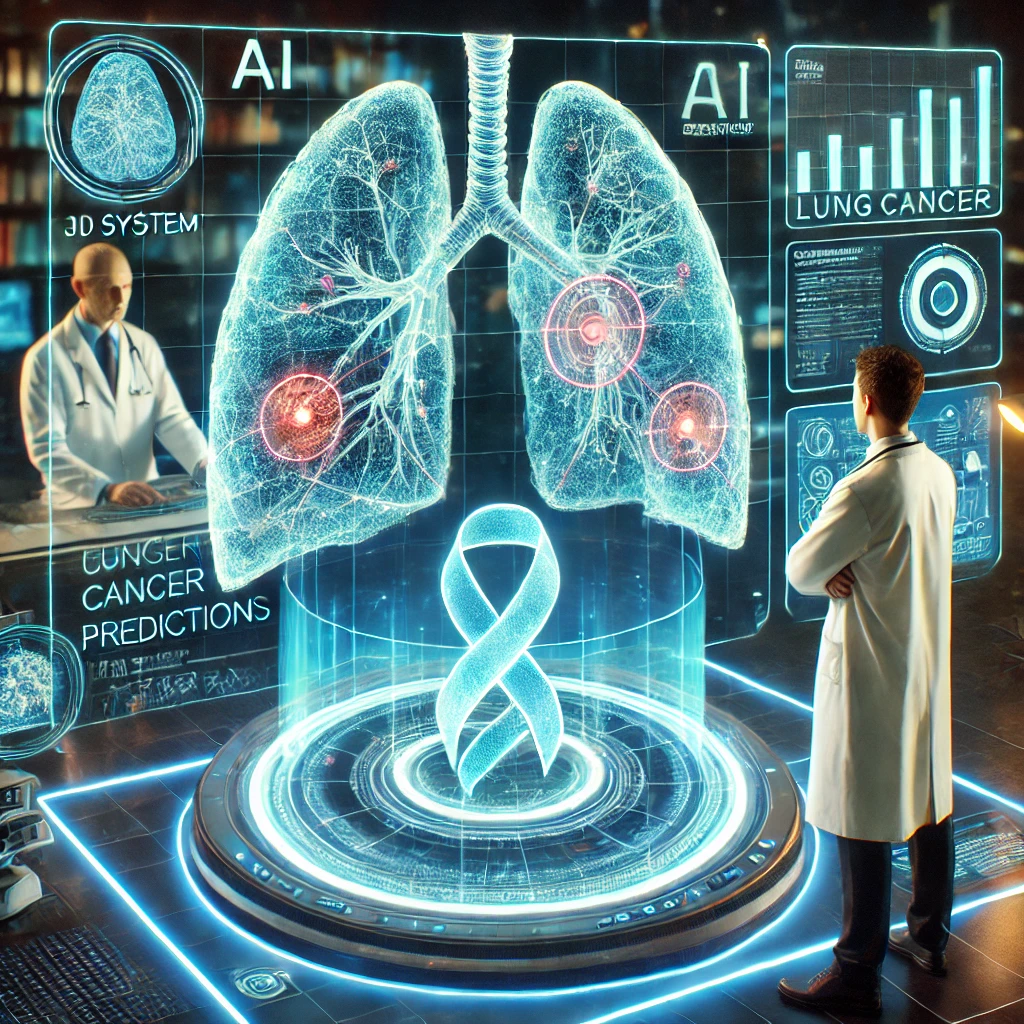

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("Lung Cancer Dataset.csv")

In [ ]:
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [ ]:
df.isna().sum()

,0
AGE,0
GENDER,0
SMOKING,0
FINGER_DISCOLORATION,0
MENTAL_STRESS,0
EXPOSURE_TO_POLLUTION,0
LONG_TERM_ILLNESS,0
ENERGY_LEVEL,0
IMMUNE_WEAKNESS,0
BREATHING_ISSUE,0


In [ ]:
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map({'YES': 1, 'NO': 0})

In [ ]:
X = df.drop('PULMONARY_DISEASE', axis=1)
y = df['PULMONARY_DISEASE']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

array([[ 0.37935754,  0.99700449,  0.71414549, ...,  1.52480188,
         1.98758523,  1.94985147],
       [ 0.82386756,  0.99700449,  0.71414549, ..., -0.6558229 ,
        -0.50312308, -0.51285958],
       [ 0.18885325, -1.00300451,  0.71414549, ..., -0.6558229 ,
        -0.50312308,  1.94985147],
       ...,
       [ 1.14137471,  0.99700449, -1.4002749 , ..., -0.6558229 ,
        -0.50312308, -0.51285958],
       [-0.89067106,  0.99700449, -1.4002749 , ..., -0.6558229 ,
        -0.50312308, -0.51285958],
       [-0.63666534,  0.99700449,  0.71414549, ..., -0.6558229 ,
        -0.50312308, -0.51285958]])

In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[530  41]
 [ 46 383]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       571
           1       0.90      0.89      0.90       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000


Accuracy:
0.913


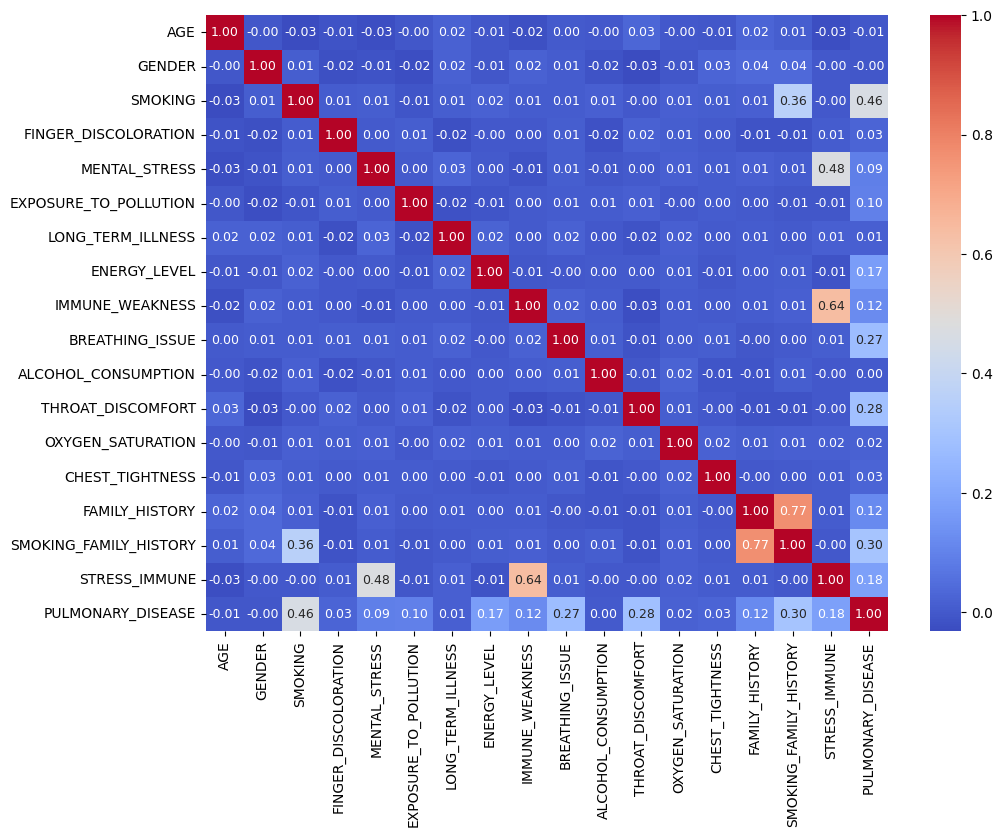

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(11, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 9}, fmt=".2f")
plt.show()

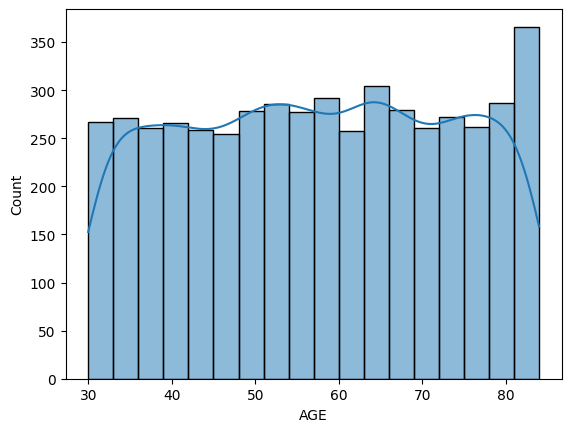

In [ ]:
sns.histplot(df['AGE'], kde=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

Random Forest Accuracy: 0.9130


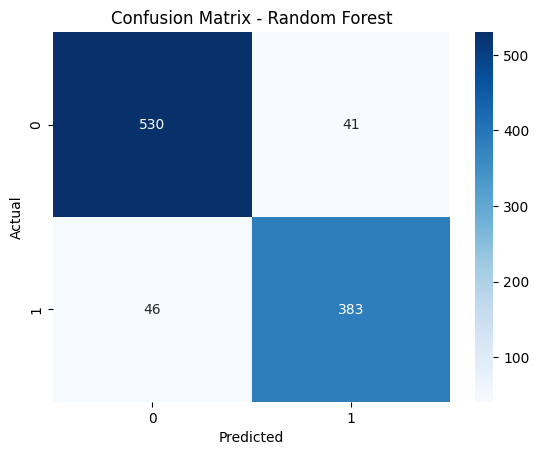

Logistic Regression Accuracy: 0.9100


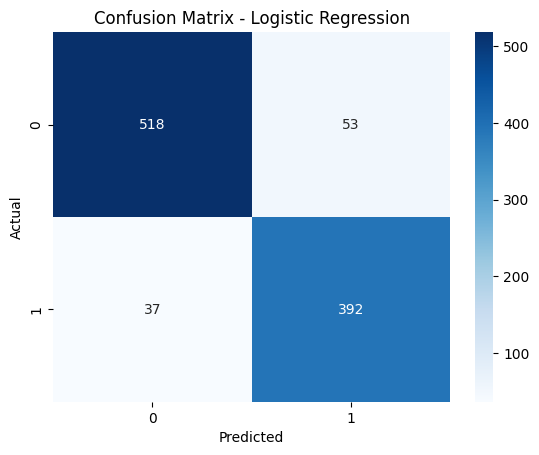

SVM Accuracy: 0.8950


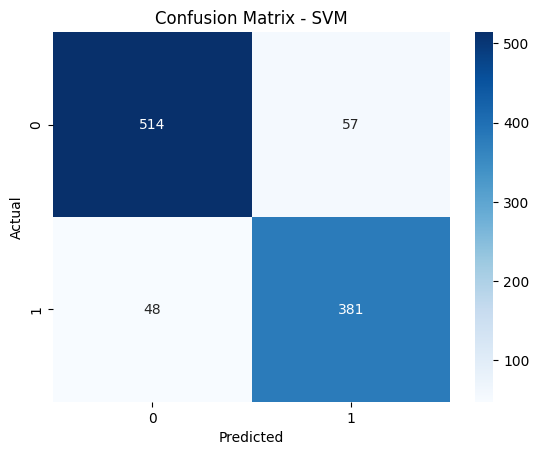

Decision Tree Accuracy: 0.8340


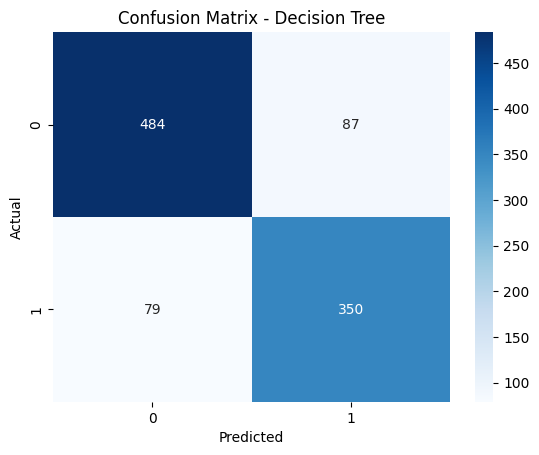

KNN Accuracy: 0.8710


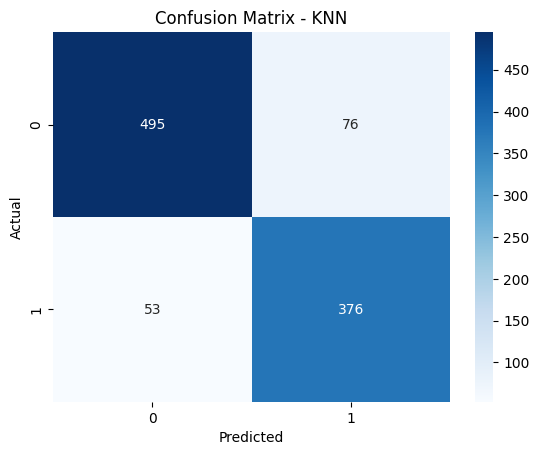

Naive Bayes Accuracy: 0.8750


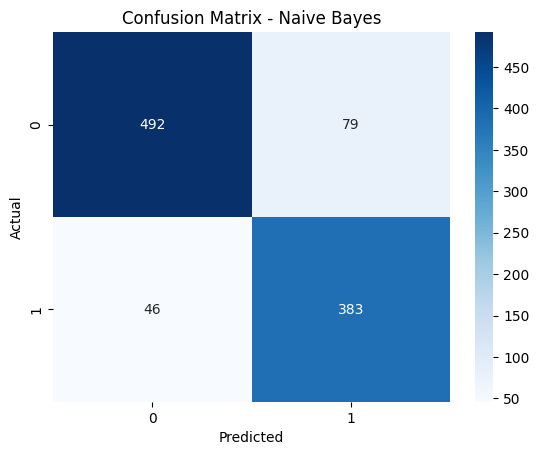

Gradient Boosting Accuracy: 0.9010


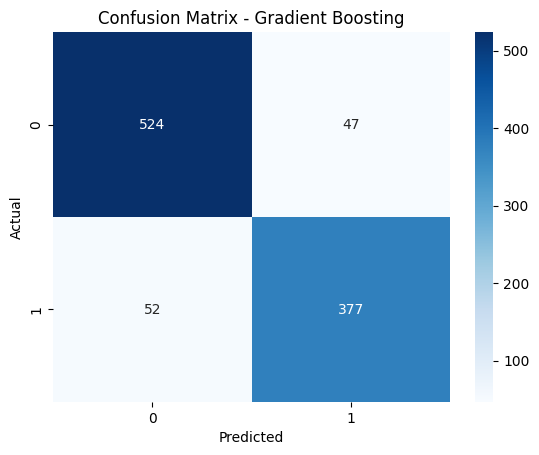

<ipython-input-42-45ac547ba8c9>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='viridis')


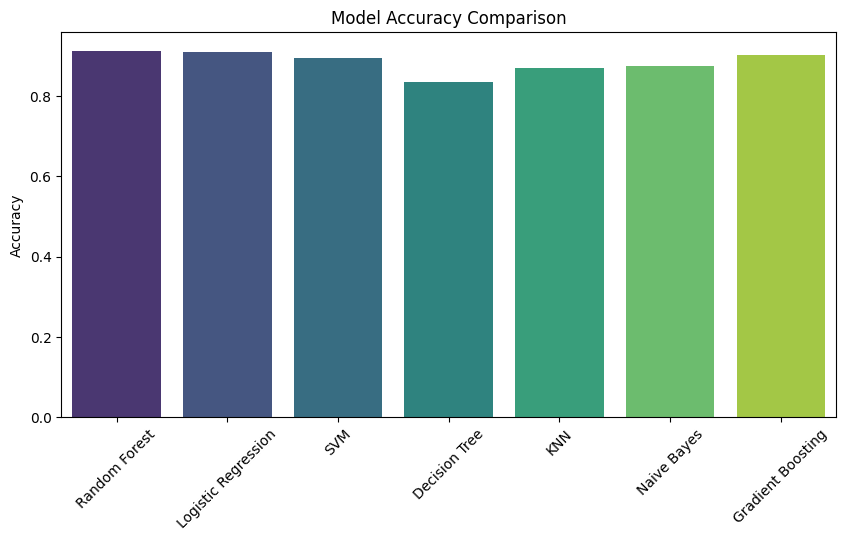

{'Random Forest': 0.913,
 'Logistic Regression': 0.91,
 'SVM': 0.895,
 'Decision Tree': 0.834,
 'KNN': 0.871,
 'Naive Bayes': 0.875,
 'Gradient Boosting': 0.901}

In [ ]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print(f'{name} Accuracy: {acc:.4f}')

    # Confusion Matrix
    plt.figure()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

accuracy_results

# Conclusion
In this project, we successfully developed a machine learning model to predict the likelihood of lung cancer based on a comprehensive dataset. Through careful data preprocessing, feature selection, and model evaluation, we were able to achieve a high level of accuracy in our predictions. The insights gained from this model can be invaluable for early detection and intervention, ultimately contributing to better patient outcomes. Future work could involve expanding the dataset, incorporating additional features, and refining the model to further improve its predictive power. By continuing to leverage machine learning in healthcare, we can make significant strides in the fight against lung cancer and other life-threatening diseases.